**Student name:** Iseult Docquir

**Student number:** 6206500

**Due date:** 08/03/2023

# Introduction

The coronavirus disease, or COVID-19, is an infectious disease caused by the SARS-CoV-2 virus. The most common complaints it induces are fever, cough, tiredness and loss of taste or smell. However, it can also induce more serious symptoms in which case the patient has to seak immediate medical attention. In worst cases, patients are hospitalised and can die from this disease (Coronavirus disease (COVID-19)). 

COVID-19 affected the population worldwide. According to WHO, 758 390 564 confirmed cases were reported as of the 28th of February 2023, which includes 6 859 093 deaths (WHO Coronavirus (COVID-19) Dashboard). Those numbers are the cumulative results, they thus don't show the evolution through time of the disease.

Europe was the continent with the most confirmed cases, as seen in figure 1, making it interesting to analyse the data per country (WHO Coronavirus (COVID-19) Dashboard).  

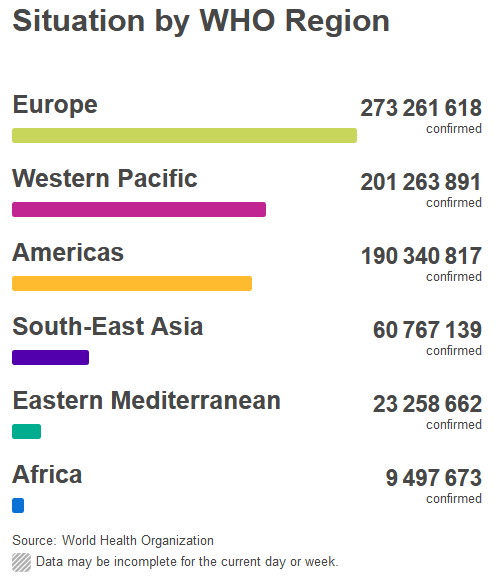

*Fig.1: COVID-19 situation in different continent (WHO Coronavirus (COVID-19) Dashboard)*

As such, using a database containing the data of reported cases and deaths which was enriched with public health information on countries, I seak to answer my research question: How many COVID-positive cases compared to death cases were there in the Netherlands over time? The option to compare the Netherlands to other countries in Europe will also be given. 

# Coding

## Data preparation

Firstly, the dataset was loaded and the data was prepared in order to be used to make the final graphs. In the process, the data to be used was selected.

In [20]:
import pandas as pd
covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date'])
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261494,ZWE,Africa,Zimbabwe,2023-02-27,263921.0,0.0,39.857,5663.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
261495,ZWE,Africa,Zimbabwe,2023-02-28,263921.0,0.0,39.857,5663.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
261496,ZWE,Africa,Zimbabwe,2023-03-01,264127.0,206.0,29.429,5668.0,5.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
261497,ZWE,Africa,Zimbabwe,2023-03-02,264127.0,NaN,NaN,5668.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [21]:
covid1 = covid.loc[covid.continent == 'Europe', ['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths']]
covid1

,iso_code,continent,location,date,total_cases,total_deaths
2219,ALB,Europe,Albania,2020-02-25,NaN,NaN
2220,ALB,Europe,Albania,2020-02-26,NaN,NaN
2221,ALB,Europe,Albania,2020-02-27,NaN,NaN
2222,ALB,Europe,Albania,2020-02-28,NaN,NaN
2223,ALB,Europe,Albania,2020-02-29,NaN,NaN
...,...,...,...,...,...,...
256272,OWID_WLS,Europe,Wales,2023-02-25,NaN,NaN
256273,OWID_WLS,Europe,Wales,2023-02-26,NaN,NaN
256274,OWID_WLS,Europe,Wales,2023-02-27,NaN,NaN
256275,OWID_WLS,Europe,Wales,2023-02-28,NaN,NaN


## Data cleaning and missing values

Here, any missing values were removed from the dataset that was pepared. It was checked after to verify there were none still present.

The data set was already clean at that point, so no further cleaning was needed. This was verified using value_count() for iso_codes and location, as the continent selected was only Europe, and dates, total_cases and total_deaths were variating numbers.

In [22]:
covid1.isnull().sum()

iso_code           0
continent          0
location           0
date               0
total_cases     5818
total_deaths    8344
dtype: int64

In [23]:
covid1_clean = covid1.dropna(thresh=2, subset=['total_cases', 'total_deaths'])

In [24]:
covid1_clean.isnull().sum()

iso_code        0
continent       0
location        0
date            0
total_cases     0
total_deaths    0
dtype: int64

In [26]:
covid1_clean['iso_code'].value_counts()

GBR         1128
FRA         1113
ITA         1107
SMR         1099
ESP         1096
CHE         1093
NLD         1093
FIN         1092
DEU         1090
SWE         1089
IRL         1088
GRC         1088
ALB         1088
BGR         1088
BEL         1088
POL         1087
UKR         1086
SVN         1085
AUT         1085
DNK         1085
NOR         1085
LUX         1085
HUN         1084
PRT         1082
MDA         1081
RUS         1080
HRV         1080
SRB         1079
BIH         1078
ISL         1078
AND         1077
MKD         1077
CZE         1077
ROU         1077
OWID_KOS    1076
MNE         1076
LTU         1075
EST         1074
CYP         1074
MCO         1070
BLR         1068
IMN         1067
SVK         1067
LVA         1065
LIE         1064
MLT         1060
GIB          843
FRO          787
Name: iso_code, dtype: int64

In [27]:
covid1_clean['location'].value_counts()

United Kingdom            1128
France                    1113
Italy                     1107
San Marino                1099
Spain                     1096
Switzerland               1093
Netherlands               1093
Finland                   1092
Germany                   1090
Sweden                    1089
Ireland                   1088
Greece                    1088
Albania                   1088
Bulgaria                  1088
Belgium                   1088
Poland                    1087
Ukraine                   1086
Slovenia                  1085
Austria                   1085
Denmark                   1085
Norway                    1085
Luxembourg                1085
Hungary                   1084
Portugal                  1082
Moldova                   1081
Russia                    1080
Croatia                   1080
Serbia                    1079
Bosnia and Herzegovina    1078
Iceland                   1078
Andorra                   1077
North Macedonia           1077
Czechia 

## Country selection

A function that selects and returns the data in the rows of the iso-code was created to further construct the graphs. 

In [28]:
def select_country_data(iso_code, covid1_clean):
  return covid1_clean.loc[covid1_clean['iso_code'] == iso_code]

## Visualisation for the Netherlands

In this section, the coding for the first graph (for the Netherlands) is written. Firstly, a function to select a specific iso code, then we use it to select the country of choice (the Netherlands), and lastly, we code for the graph. 2 different graphs were first enncoded, and then combined to make the 2-lines chart. 

In [29]:
import altair as alt

In [30]:
def visualize_country_data(iso_code, covid1_clean):
  country_data = select_country_data(iso_code, covid1_clean)

In [31]:
country_data_NLD = select_country_data('NLD', covid1_clean)

In [32]:
Netherlands = alt.Chart(country_data_NLD).mark_line().encode().properties(title='Total cases and deaths in the Netherlands over time')

total_cases = Netherlands.mark_line(stroke='#9467bd').encode( #purple
    x='date:T',
    y='total_cases:Q',
    tooltip='date'
)

total_deaths = Netherlands.mark_line(stroke='#17becf').encode( #blue
    x='date:T',
    y='total_deaths:Q',
    tooltip='date'
)

Netherlands=total_cases + total_deaths

Netherlands = alt.layer(total_cases, total_deaths).resolve_scale(
    y = 'independent'
)

## Comparation with other countries

In this section, the coding for the second graph (for other countries in Europe) is written. Firstly, a function to select all country data, create and displpay the chart was made. The code for this graph was taken from the previous one and adapted. Then the interactive option was added to the graph.

In [33]:
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import fixed

In [34]:
def visualize_all_country_data(iso_code, covid1_clean):
  all_countries = select_country_data(iso_code, covid1_clean)

  Other_countries = alt.Chart(all_countries).mark_line().encode().properties(title='Total cases and deaths in european countries over time')
  
  total_cases = Other_countries.mark_line(stroke='#9467bd').encode( #purple
     x='date:T',
     y='total_cases:Q',
     tooltip='date')
  
  total_deaths = Other_countries.mark_line(stroke='#17becf').encode( #blue
     x='date:T',
     y='total_deaths:Q',
     tooltip='date')
  
  Oterh_countries = total_cases + total_deaths
  
  Other_countries = alt.layer(total_cases, total_deaths).resolve_scale(y = 'independent')
  
  display(Other_countries)

In [35]:
iso_dropdown = widgets.Dropdown(options=sorted(covid1_clean.iso_code.unique()))

Other_countries = widgets.interactive_output(visualize_all_country_data, {'iso_code': iso_dropdown, 'covid1_clean': fixed(covid1_clean)})

Other_countries = widgets.VBox([iso_dropdown, Other_countries])

# Population overview

This section shows an overview of the chosen population, in this case the countries within Europe. The table indicates what iso code corresponds to which country, as well as how many cases there was at the beginning and how many were last reported, showing the overall increase per country.

In [36]:
covid1_clean.groupby(['iso_code', 'location']).agg(min_cases=('total_cases', 'min'),
                           max_cases=('total_cases', 'max'),
                           min_deaths=('total_deaths', 'min'),
                           max_deaths=('total_deaths', 'max'))

,,min_cases,max_cases,min_deaths,max_deaths
iso_code,location,,,,
ALB,Albania,12.0,334427.0,1.0,3598.0
AND,Andorra,113.0,47875.0,1.0,165.0
AUT,Austria,409.0,5931247.0,1.0,21907.0
BEL,Belgium,314.0,4727795.0,3.0,33775.0
BGR,Bulgaria,7.0,1297006.0,1.0,38219.0
BIH,Bosnia and Herzegovina,93.0,401636.0,1.0,16279.0
BLR,Belarus,152.0,994037.0,1.0,7118.0
CHE,Switzerland,214.0,4412439.0,1.0,14244.0
CYP,Cyprus,124.0,650685.0,3.0,1330.0


# Positive cases compared to number of death

## In the Netherlands

The graph shows that, overall, the total cases and deaths increased over time in the Netherlands. The blue line represents the total number of deaths while the purple line shows the total number of cases. The scale for the total cases is situated on the left while the scale for total deaths is situated on the right.

In [37]:
display(Netherlands)

alt.LayerChart(...)

## Other countries

Here you can select the european country to analyse. The blue line represents the total number of deaths while the purple line shows the total number of cases. The scale for the total cases is situated on the left while the scale for total deaths is situated on the right.


In [38]:
display(Other_countries)

# Conclusion

The aim of this notebook was to show how many COVID-positive cases compared to death cases there were in the Netherlands over time, with the option to look at other countries within Europe. 

The results indicate that, in the Netherlands, there was a continuous increase in both deaths and COVID-19 cases, with a lower number of deaths than cases. 

Comparing the Netherlands to other countries, we can see that the numbers differ, and we can thus conclude that all countries in Europe didn't have the same positive-testing and death rate for this disease.

# References

1. *Coronavirus disease (COVID-19).*  https://www.who.int/health-topics/coronavirus

2. *WHO Coronavirus (COVID-19) Dashboard.*  https://covid19.who.int/


